# Interaction PDP Plots

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)


This notebook was created by [Sal J.M](https://www.linkedin.com/in/salim-j-m-a04534114/). Thank you so much for your contribution Sal!!

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [3]:
from xgboost import XGBClassifier

### Load Iris data

In [4]:
# Load the Iris dataset from scikit-learn
iris = load_iris()

# Create a pandas DataFrame from the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# The target variable (species) is available as 'target' in iris
iris_df['species'] = iris.target

# Create X (features) and y (target)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 0 corresponds to the species "setosa."
- 1 corresponds to the species "versicolor."
- 2 corresponds to the species "virginica."

### Split Data

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# balanced test data
y_test.value_counts()

species
0    10
2    10
1    10
Name: count, dtype: int64

### Train XGBOOST

In [8]:
# create xgboost classifier
xgbc = XGBClassifier(n_estimators=10,
                     max_depth=1,
                     random_state=3,)

# train
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### XGBoost Feature Importance

 XGboost provides feature importance which can be used as a gloabal interpretation method


In [9]:
pd.Series(xgbc.feature_importances_,
          index=X_train.columns).sort_values(ascending=False)

petal width (cm)     0.529351
petal length (cm)    0.470649
sepal length (cm)    0.000000
sepal width (cm)     0.000000
dtype: float32

### PDP with scikit-learn

In [10]:
from sklearn.inspection import PartialDependenceDisplay

#### PDP for the important features

 - 2 main differences here against a 1-way PDP
     - the features parameter in the from_estimator method need to be a tuple or a list containing a tuple
     - we also need to specify a specific label for the target as this is a multi-class problem

#### Interaction PDP for Setosa

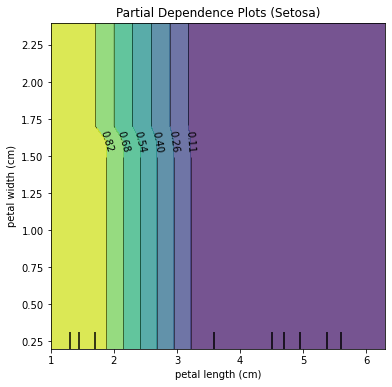

In [11]:
# plot PDP for the 2 important features (from xgboost feature importance)
important_features = ['petal length (cm)', 'petal width (cm)', ]

fig, ax = plt.subplots(figsize=(6, 6))

PartialDependenceDisplay.from_estimator(
    xgbc,
    X_test,
    # tuple to show the interaction of both important features
    [(important_features[0],
      important_features[1])],
    target=0,  # set the target to 0 to show the probability for Setosa
    ax=ax,
)
ax.set_title('Partial Dependence Plots (Setosa)')
plt.show()

 - The plot shows:
    - Petal length on the x-axis.
    - Petal width on the y-axis.
    - Colors represent the third dimension or the predicted probability of Setosa.
    - The yellow rectangle highlights the area with the highest probability for Setosa (greater than 82%).
        - This area corresponds to petal length less than 2cm and all petal width values.
        - In other words, although globally important (ranked second in feature importance), petal width is not the primary factor used to detect Setosas.

In [12]:
# we can verify by isolating the setosa 
#in the data and computing some describtive statistics

iris_df[iris_df['species'] == 0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


 - We can see, that indeed, the max of petal length is 1.9 cm.

#### Interaction PDP for versicolor

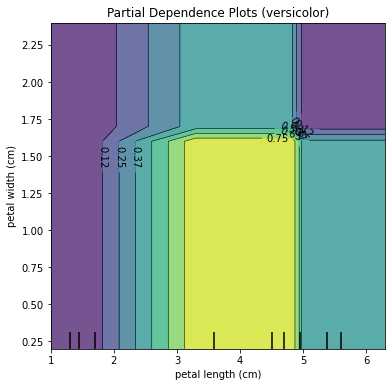

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
PartialDependenceDisplay.from_estimator(
    xgbc,
    X_test,
    # tuple to show the interaction of both important features
    [(important_features[0], important_features[1])],
    target=1,  # set the target to 1 to show the probability for versicolor
    ax=ax,
)
ax.set_title('Partial Dependence Plots (versicolor)')
plt.show()

 - The plot for Versicolor exhibits more pronounced interactions compared to the Setosa plot.
 - In this case, the high probability region is influenced by both features. 
     - The yellow-shaded area encompasses
        - Petal lengths ranging from 3 to 5 cm.
        - Petal widths between 0.25 and 1.6 cm.
    
     

In [14]:
iris_df[iris_df['species'] == 1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


#### Interaction PDP for virginica

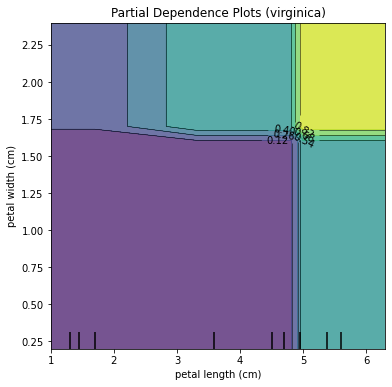

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
PartialDependenceDisplay.from_estimator(
    xgbc,
    X_test,
    # tuple to show the interaction of both important features
    [(important_features[0], important_features[1])],
    target=2,  # set the target to 1 to show the probability for virginica
    ax=ax,
)
ax.set_title('Partial Dependence Plots (virginica)')
plt.show()

 - The Virginica plot, similar to the Versicolor plot, displays more noticeable feature interactions compared to the Setosa plot.
 - In this scenario, the region with the highest probability is shaped by the interplay of both features:
     - The yellow-shaded region covers:
         - Petal lengths within the range of 5 to 7 cm.
         - Petal widths ranging from 1.75 to 2.5 cm.

In [16]:
iris_df[iris_df['species'] == 2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0
